In [1]:
from importlib import reload

In [12]:
import pandas as pd

In [15]:
%matplotlib inline

In [2]:
import src.tm_roller; reload(src.tm_roller)
import src.bsln_kde;reload(src.bsln_kde)
import src.bsln_bower;reload(src.bsln_bower)

from src.data_prep import prep_911_by_category
from src.spatial_unit import baltimore_grids
from src.eval_metric import hit_rate
from src.tm_roller import TM_ROLLER
from src.bsln_kde import KDE, prep_data
from src.bsln_bower import Bower
from src.bsln_rtm import RTM

In [3]:
crimes = prep_data('data/open-baltimore/raw/BPD_Part_1_Victim_Based_Crime_Data.csv', 
                 col_lon='Longitude', col_lat='Latitude', col_date='CrimeDate', to_epsg=3559)

In [5]:
d911 = prep_911_by_category()


In [6]:
tune_sd = '2013-01-01'
tune_ed = '2013-12-31'
train_tw = 60
vstep = 1
vtw = 1
vsd = '2015-03-02'
ved = '2015-03-10'
grid_size=200

In [7]:
crimes.index[0].strftime('%Y-%m-%d')

'2013-01-01'

In [8]:
grids = baltimore_grids(grid_size=grid_size)

# for each tune period

In [9]:
# method.tune(data.loc[tune_sd:tune_ed].coords, cv=10, bw_choice=[10, 100, 200, 300, 400, 500], n_jobs=4)

In [10]:
# method = KDE(verbose=1, bw=400)
bower = Bower(grid_size, bw=400, tw=train_tw, verbose=1)
print(bower)
tmroller_bower = TM_ROLLER(bower, crimes.Coords, crimes.Coords, vsd, ved, roll_step=vstep, eval_tw=vtw, verbose=2)
res_bower = tmroller_bower.eval(hit_rate, grids)

Bower method: weighted by distance and time, bandwidth=400, time window=60, verbose=1
wrap pd.Series with dict key
Date: [2013-01-01, 2018-02-17]
total number of experiment: 8
No.1 exp, testing period: 2015-03-02 ~ 2015-03-02
coords is a dictionary, extracting the only one value
No.2 exp, testing period: 2015-03-03 ~ 2015-03-03
coords is a dictionary, extracting the only one value
No.3 exp, testing period: 2015-03-04 ~ 2015-03-04
coords is a dictionary, extracting the only one value
No.4 exp, testing period: 2015-03-05 ~ 2015-03-05
coords is a dictionary, extracting the only one value
No.5 exp, testing period: 2015-03-06 ~ 2015-03-06
coords is a dictionary, extracting the only one value
No.6 exp, testing period: 2015-03-07 ~ 2015-03-07
coords is a dictionary, extracting the only one value
No.7 exp, testing period: 2015-03-08 ~ 2015-03-08
coords is a dictionary, extracting the only one value
No.8 exp, testing period: 2015-03-09 ~ 2015-03-09
coords is a dictionary, extracting the only on

In [13]:
df_bower = pd.DataFrame.from_dict(res_bower)
print(bower)
df_bower

Bower method: weighted by distance and time, bandwidth=400, time window=60, verbose=1


,2015-03-02~2015-03-02,2015-03-03~2015-03-03,2015-03-04~2015-03-04,2015-03-05~2015-03-05,2015-03-06~2015-03-06,2015-03-07~2015-03-07,2015-03-08~2015-03-08,2015-03-09~2015-03-09,2015-03-10~2015-03-10
10%,0.320000,0.392157,0.378947,0.407407,0.426966,0.407407,0.454545,0.443182,0.447368
20%,0.640000,0.617647,0.578947,0.666667,0.640449,0.555556,0.666667,0.670455,0.614035
30%,0.813333,0.735294,0.715789,0.851852,0.752809,0.691358,0.767677,0.772727,0.710526
40%,0.840000,0.833333,0.800000,0.925926,0.820225,0.901235,0.838384,0.875000,0.850877
50%,0.933333,0.931373,0.863158,0.962963,0.932584,0.938272,0.909091,0.954545,0.894737
60%,0.973333,0.980392,0.894737,1.000000,0.955056,0.987654,0.979798,0.977273,0.929825
70%,1.000000,0.990196,0.978947,1.000000,0.977528,1.000000,0.989899,1.000000,1.000000
80%,1.000000,1.000000,0.989474,1.000000,1.000000,1.000000,0.989899,1.000000,1.000000
90%,1.000000,1.000000,0.989474,1.000000,1.000000,1.000000,0.989899,1.000000,1.000000
100%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
rtm = RTM(grid_size=grid_size, bw=400, tw=train_tw, verbose=1)
print(rtm)
tmroller_rtm = TM_ROLLER(rtm, d911, crimes.Coords, vsd, ved, roll_step=vstep, eval_tw=vtw, verbose=2)
res_rtm = tmroller_rtm.eval(hit_rate, grids)

RTM with bandwidth=400 meters, grid size=200 meters, time window=60 days
Date: [2013-01-01, 2018-02-17]
total number of experiment: 8
No.1 exp, testing period: 2015-03-02 ~ 2015-03-02
using KDE of [abuse,arson,assault,burglary,disorderly conduct,insecurity,mental case,missing person,other offense,robbery,shooting,theft_larceny] to compute risk scores
No.2 exp, testing period: 2015-03-03 ~ 2015-03-03
using KDE of [abuse,arson,assault,burglary,disorderly conduct,insecurity,mental case,missing person,other offense,robbery,shooting,theft_larceny] to compute risk scores
No.3 exp, testing period: 2015-03-04 ~ 2015-03-04
using KDE of [abuse,arson,assault,burglary,disorderly conduct,insecurity,mental case,missing person,other offense,robbery,shooting,theft_larceny] to compute risk scores
No.4 exp, testing period: 2015-03-05 ~ 2015-03-05
using KDE of [abuse,arson,assault,burglary,disorderly conduct,insecurity,mental case,missing person,other offense,robbery,shooting,theft_larceny] to compute ri

In [14]:
df_rtm = pd.DataFrame.from_dict(res_rtm)
print(rtm)
df_rtm

RTM with bandwidth=400 meters, grid size=200 meters, time window=60 days


,2015-03-02~2015-03-02,2015-03-03~2015-03-03,2015-03-04~2015-03-04,2015-03-05~2015-03-05,2015-03-06~2015-03-06,2015-03-07~2015-03-07,2015-03-08~2015-03-08,2015-03-09~2015-03-09,2015-03-10~2015-03-10
10%,0.360000,0.343137,0.400000,0.370370,0.438202,0.345679,0.373737,0.352273,0.359649
20%,0.560000,0.509804,0.578947,0.611111,0.617978,0.530864,0.626263,0.545455,0.587719
30%,0.706667,0.676471,0.684211,0.777778,0.752809,0.728395,0.696970,0.761364,0.710526
40%,0.773333,0.764706,0.789474,0.907407,0.808989,0.851852,0.808081,0.852273,0.780702
50%,0.880000,0.862745,0.894737,0.925926,0.853933,0.950617,0.898990,0.897727,0.815789
60%,0.920000,0.950980,0.957895,0.925926,0.977528,0.962963,0.959596,0.931818,0.912281
70%,0.946667,0.970588,0.968421,0.925926,0.977528,0.975309,0.959596,0.943182,0.921053
80%,0.946667,0.970588,0.968421,0.925926,0.988764,0.975309,0.959596,0.954545,0.921053
90%,0.973333,0.980392,0.989474,0.944444,1.000000,0.987654,0.979798,1.000000,0.964912
100%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


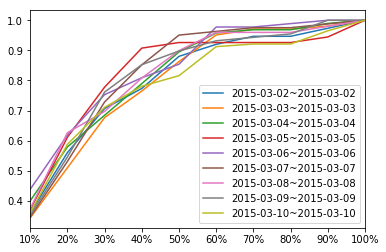

In [16]:
df_rtm.plot()

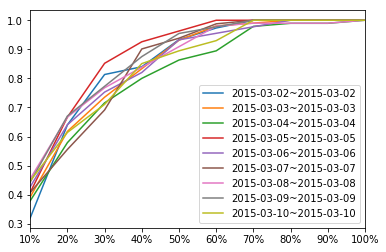

In [17]:
df_bower.plot()

In [44]:
# Bower method: weighted by distance and time, bandwidth=400, time window=60, verbose=1
df

,2014-03-02~2014-03-02,2014-03-03~2014-03-03,2014-03-04~2014-03-04,2014-03-05~2014-03-05,2014-03-06~2014-03-06,2014-03-07~2014-03-07,2014-03-08~2014-03-08,2014-03-09~2014-03-09,2014-03-10~2014-03-10
10%,0.470588,0.438596,0.432990,0.398058,0.411215,0.422018,0.519231,0.397849,0.435115
20%,0.717647,0.631579,0.711340,0.533981,0.523364,0.669725,0.625000,0.602151,0.625954
30%,0.811765,0.736842,0.793814,0.640777,0.663551,0.798165,0.711538,0.795699,0.709924
40%,0.858824,0.877193,0.855670,0.825243,0.785047,0.899083,0.836538,0.913978,0.847328
50%,0.976471,0.929825,0.907216,0.883495,0.906542,0.944954,0.923077,0.956989,0.923664
60%,0.988235,0.964912,0.948454,0.951456,0.953271,0.972477,0.942308,1.000000,0.992366
70%,1.000000,0.964912,0.969072,0.990291,0.990654,1.000000,0.961538,1.000000,1.000000
80%,1.000000,0.982456,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
90%,1.000000,0.982456,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
100%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
